# Conexiones e importaciones

In [ ]:
# --- IMPORTAR LIBRERÍAS NECESARIAS ---

import os                      # Trabajar con el sistema operativo y leer variables de entorno
from dotenv import load_dotenv # Cargar las variables definidas en el archivo .env
import spotipy                 # Cliente para interactuar con la API de Spotify
from spotipy.oauth2 import SpotifyClientCredentials  # Autenticación con Spotify mediante client_id y client_secret
import pandas as pd            # Manipulación y análisis de datos con DataFrames
from urllib.parse import quote # Codificar textos para usarlos correctamente en URLs (espacios, acentos, etc.)
import numpy as np             # Operaciones numéricas y manejo eficiente de arrays
import mysql.connector         # Conexión a bases de datos MySQL
from mysql.connector import Error  # Manejo de errores específicos de MySQL
import matplotlib.pyplot as plt  # Visualización de datos mediante gráficos


In [ ]:
load_dotenv()  # Carga las variables definidas en el archivo .env al entorno del sistema

# --- Spotify ---
mis_credenciales = SpotifyClientCredentials(
    client_id=os.getenv("SPOTIFY_CLIENT_ID"),        # Obtiene el client_id desde las variables de entorno
    client_secret=os.getenv("SPOTIFY_CLIENT_SECRET") # Obtiene el client_secret desde las variables de entorno
)
spotify = spotipy.Spotify(auth_manager=mis_credenciales)  # Cliente autenticado para interactuar con la API de Spotify

# --- Last.fm ---
api_key_lastfm = os.getenv("API_KEY_LASTFM")            # API key de Last.fm cargada desde .env
shared_secret_lastfm = os.getenv("SHARED_SECRET_LASTFM") # Shared secret de Last.fm cargado desde .env

# --- MySQL ---
MYSQL_HOST = os.getenv("MYSQL_HOST")          # Dirección del servidor MySQL
MYSQL_USER = os.getenv("MYSQL_USER")          # Usuario configurado para la conexión
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")  # Contraseña del usuario MySQL


In [ ]:
# --- CONEXIÓN PYTHON → MYSQL ---
try:
    cnx = mysql.connector.connect(
        host=MYSQL_HOST,         # Dirección del servidor MySQL
        user=MYSQL_USER,         # Usuario configurado en las variables de entorno
        password=MYSQL_PASSWORD, # Contraseña del usuario
        database="musicstream_db" # Base de datos a la que queremos conectarnos
    )
    print('Conexión exitosa')     # Confirmación si la conexión se establece correctamente

except Error as e:
    print('Error al conectar:', e)  # Mensaje detallado si ocurre un error en la conexión


Conexión exitosa


# Consultas

In [ ]:

# --- 1. Top 10 artistas más populares ---

# Inicio del cursor para ejecutar consultas SQL
mycursor = cnx.cursor()

# Consulta SQL: obtiene los 10 artistas con mayor número de oyentes
query1 = """
SELECT artista, oyentes
FROM (
    SELECT artista, MAX(oyentes) AS oyentes   -- Para cada artista, toma su valor máximo de oyentes
    FROM canciones
    GROUP BY artista                          -- Agrupa por artista para evitar duplicados
) AS sub
ORDER BY oyentes DESC                         -- Ordena de mayor a menor
LIMIT 10;                                     -- Devuelve solo los 10 primeros
"""

# Ejecuta la consulta y devuelve los resultados directamente como DataFrame de pandas
top_10_artistas = pd.read_sql_query(query1, cnx)

top_10_artistas  # Muestra el DataFrame con los 10 artistas más escuchados

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17356\1568938788.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_artistas = pd.read_sql_query(query1,cnx)


,artista,oyentes
0,Radiohead,8016751
1,Nirvana,7347570
2,Red Hot Chili Peppers,7080258
3,Queen,7053767
4,Arctic Monkeys,6897462
5,The Killers,6771735
6,Linkin Park,6741156
7,Maroon 5,6443740
8,Green Day,6413285
9,The Beatles,6349003


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Radiohead'),
  Text(1, 0, 'Nirvana'),
  Text(2, 0, 'Red Hot Chili Peppers'),
  Text(3, 0, 'Queen'),
  Text(4, 0, 'Arctic Monkeys'),
  Text(5, 0, 'The Killers'),
  Text(6, 0, 'Linkin Park'),
  Text(7, 0, 'Maroon 5'),
  Text(8, 0, 'Green Day'),
  Text(9, 0, 'The Beatles')])

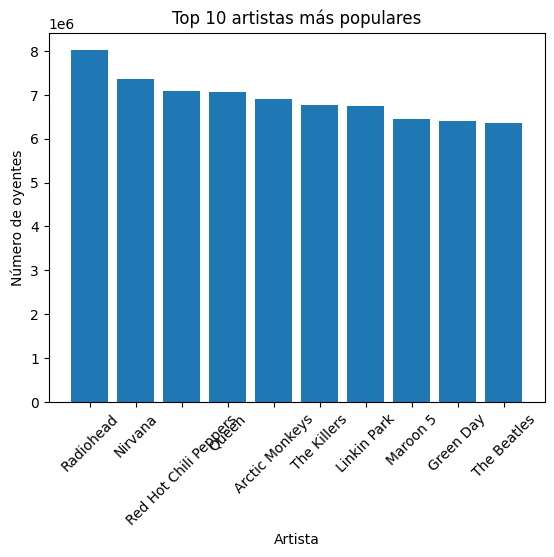

In [ ]:
# --- GRÁFICO DE LOS 10 ARTISTAS MÁS POPULARES ---

# Extraer columnas del DataFrame
artistas = top_10_artistas['artista']   # Nombres de los artistas
oyentes = top_10_artistas['oyentes']    # Número de oyentes por artista

# Crear gráfica de barras
plt.bar(artistas, oyentes)

# Títulos y etiquetas del gráfico
plt.title("Top 10 artistas más populares")
plt.xlabel("Artista")
plt.ylabel("Número de oyentes")

# Rotar los nombres del eje X para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [ ]:

# --- 2. Año con mayor número de canciones lanzadas ---

#  Inicio del cursor para ejecutar consultas SQL
mycursor = cnx.cursor()

# Consulta SQL: cuenta cuántas canciones hay por año de lanzamiento
query = """
SELECT lanzamiento AS año,
       COUNT(*) AS total_canciones
FROM canciones
GROUP BY lanzamiento              -- Agrupa por año de lanzamiento
ORDER BY total_canciones DESC;    -- Ordena de mayor a menor cantidad de canciones
"""

# Ejecuta la consulta y devuelve los resultados como DataFrame de pandas
años_mas_canciones = pd.read_sql_query(query, cnx)

años_mas_canciones  # Muestra el DataFrame con los años que tienen más canciones registradas


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17356\861662858.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  años_mas_canciones = pd.read_sql_query(query,cnx)


,año,total_canciones
0,2014,13980
1,2012,13498
2,2010,10797
3,2018,10166
4,2016,9290


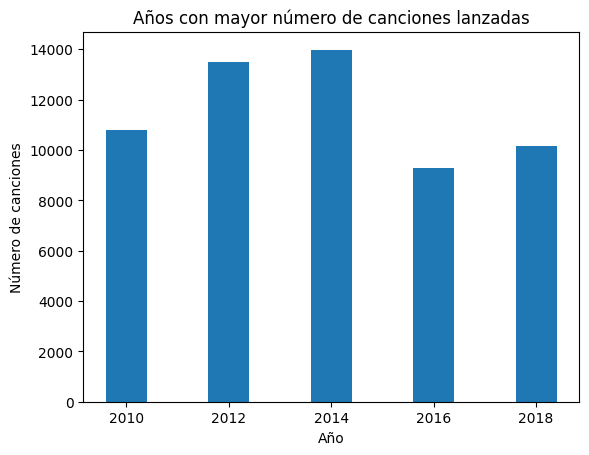

In [ ]:
# --- GRÁFICO: AÑOS CON MÁS CANCIONES LANZADAS ---

# Extraer columnas del DataFrame
años = años_mas_canciones['año']                 # Años de lanzamiento
total = años_mas_canciones['total_canciones']    # Número total de canciones por año

# Crear gráfica de barras
plt.bar(años, total)

# Títulos y etiquetas del gráfico
plt.title("Años con mayor número de canciones lanzadas")
plt.xlabel("Año")
plt.ylabel("Número de canciones")

# Mostrar gráfica
plt.show()



In [ ]:
# --- 3. Analizar los años con mayor número de álbumes lanzados ---

# Inicio del cursor para ejecutar consultas SQL
mycursor = cnx.cursor()

# Consulta SQL: cuenta cuántos álbumes distintos se lanzaron por año
query2 = """
SELECT lanzamiento AS año,
       COUNT(DISTINCT album) AS total_albumes   -- Cuenta álbumes únicos por año
FROM canciones
GROUP BY lanzamiento                            -- Agrupa por año de lanzamiento
ORDER BY total_albumes DESC;                    -- Ordena de mayor a menor cantidad de álbumes
"""

# Ejecuta la consulta y devuelve los resultados como DataFrame de pandas
años_mas_albumes = pd.read_sql_query(query2, cnx)

años_mas_albumes  # Muestra el DataFrame con los años que tienen más álbumes registrados


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17356\3579779705.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  años_mas_albumes = pd.read_sql_query(query2,cnx)


,año,total_albumes
0,2018,1411
1,2014,1255
2,2016,1134
3,2012,1061
4,2010,870


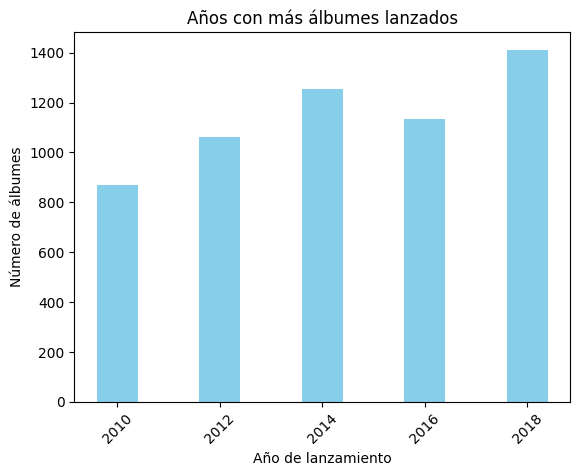

In [20]:
# GRÁFICO DE AÑOS CON MAYOR NÚMERO DE ALBUMES LANZADOS

# Extraer columnas
años = años_mas_albumes['año']
total_albumes = años_mas_albumes['total_albumes']

# Crear gráfico de barras
plt.bar(años, total_albumes, color='skyblue')

# Títulos y etiquetas
plt.title("Años con más álbumes lanzados")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de álbumes")

# Rotar etiquetas para que se lean mejor
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()


In [ ]:
# --- 4. EVOLUCIÓN DE LOS GÉNEROS POR AÑO ---

# Inicio del cursor para ejecutar consultas SQL
mycursor = cnx.cursor()

# Consulta SQL: cuenta cuántas canciones se lanzaron por género en cada año
query2 = """
SELECT lanzamiento AS año,
       genero,
       COUNT(*) AS total_canciones
FROM canciones
GROUP BY año, genero                     -- Agrupa por año y por género
ORDER BY año, total_canciones DESC;      -- Ordena primero por año y luego por número de canciones
"""

# Ejecuta la consulta y devuelve los resultados como DataFrame de pandas
evolucion_generos_año = pd.read_sql_query(query2, cnx)

evolucion_generos_año  # Muestra la tabla con la evolución de géneros por año


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17356\1181056493.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  evolucion_generos_año = pd.read_sql_query(query2,cnx)


,año,genero,total_canciones
0,2010,rock,3707
1,2010,jazz,3265
2,2010,country,2275
3,2010,latin,1550
4,2012,jazz,4906
5,2012,rock,3553
6,2012,country,2708
7,2012,latin,2331
8,2014,jazz,5715
9,2014,rock,3758


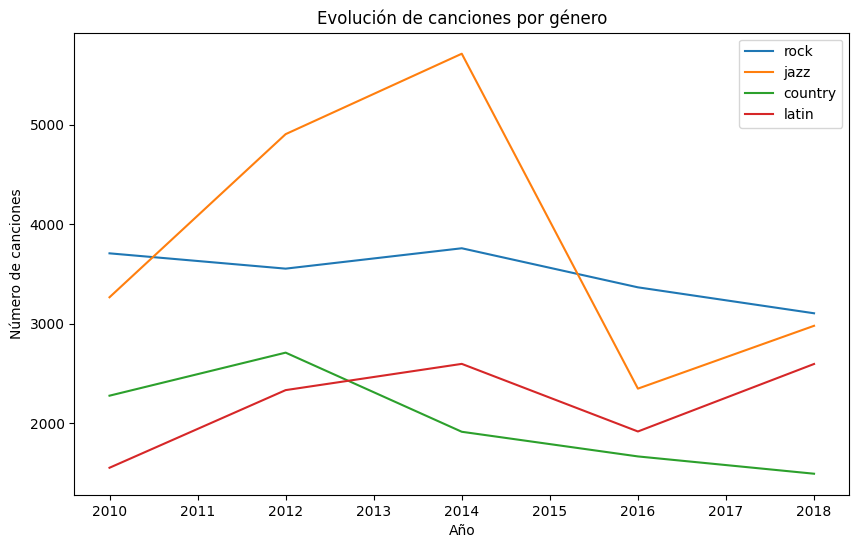

In [22]:
# GRAFICO DE LA EVOLUCION DE LOS GENEROS POR AÑO

plt.figure(figsize=(10,6))

# Dibujar línea para cada género automáticamente
for genero in evolucion_generos_año['genero'].unique():
    plt.plot(
        evolucion_generos_año[evolucion_generos_año['genero'] == genero]['año'],
        evolucion_generos_año[evolucion_generos_año['genero'] == genero]['total_canciones'],
        label=genero
    )

plt.title("Evolución de canciones por género")
plt.xlabel("Año")
plt.ylabel("Número de canciones")
plt.legend()
plt.show()

In [ ]:
# --- 5. Evolución de los oyentes a lo largo de los años ---

# Inicio del cursor para ejecutar consultas SQL
mycursor = cnx.cursor()

# Consulta SQL: calcula el promedio de oyentes por año de lanzamiento
query = """
SELECT lanzamiento AS año,
       AVG(oyentes) AS oyentes_promedio   -- Promedio de oyentes por año
FROM canciones
GROUP BY lanzamiento                      -- Agrupa por año
ORDER BY año;                             -- Ordena cronológicamente
"""

# Ejecuta la consulta y devuelve los resultados como DataFrame de pandas
promedio_oyentes = pd.read_sql_query(query, cnx)

promedio_oyentes  # Muestra el DataFrame con el promedio de oyentes por año


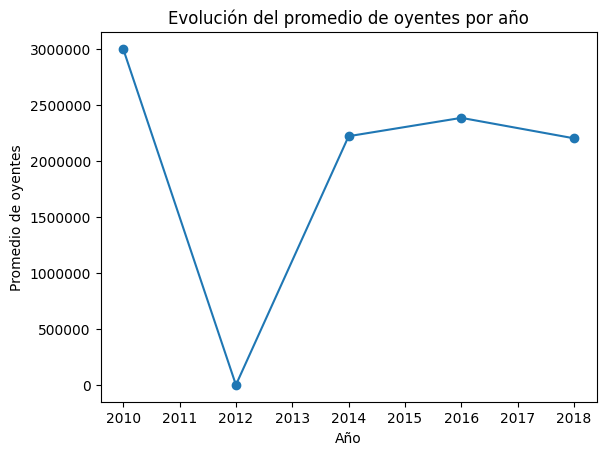

In [11]:
# GRÁFICO EVOLUCION DEL PROMEDIO DE OYENTES POR AÑO
años = [2010,2012,2014,2016,2018]
oyentes_promedio = [3.001331e+06, 2.701663e+0, 2.221810e+06, 2.385565e+06, 2.202613e+06]  # en formato normal

plt.plot(años, oyentes_promedio, marker='o')  # línea con puntos
plt.title("Evolución del promedio de oyentes por año")
plt.xlabel("Año")
plt.ylabel("Promedio de oyentes")

# Evitar notación científica
plt.ticklabel_format(style='plain', axis='y')

plt.show()


In [ ]:
# Inicio del cursor para ejecutar consultas SQL
mycursor = cnx.cursor()

# Consulta SQL: calcula el promedio de oyentes por género en cada año
query = """
SELECT lanzamiento AS año,
       genero,
       AVG(oyentes) AS oyentes_promedio   -- Promedio de oyentes por género y año
FROM canciones
GROUP BY lanzamiento, genero              -- Agrupa por año y por género
ORDER BY año, genero;                     -- Ordena cronológicamente y luego alfabéticamente por género
"""

# Ejecuta la consulta y devuelve los resultados como DataFrame de pandas
oyentes_genero_año = pd.read_sql_query(query, cnx)

oyentes_genero_año  # Muestra el DataFrame con el promedio de oyentes por género y año


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11804\2100602134.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  oyentes_genero_año = pd.read_sql_query(query,cnx)


,año,genero,oyentes_promedio
0,2010,country,2.016986e+06
1,2010,jazz,1.937262e+06
2,2010,latin,4.379586e+05
3,2010,rock,5.614442e+06
4,2012,country,2.292487e+06
5,2012,jazz,2.084376e+06
6,2012,latin,4.925627e+05
7,2012,rock,5.315194e+06
8,2014,country,9.841751e+05
9,2014,jazz,1.650524e+06


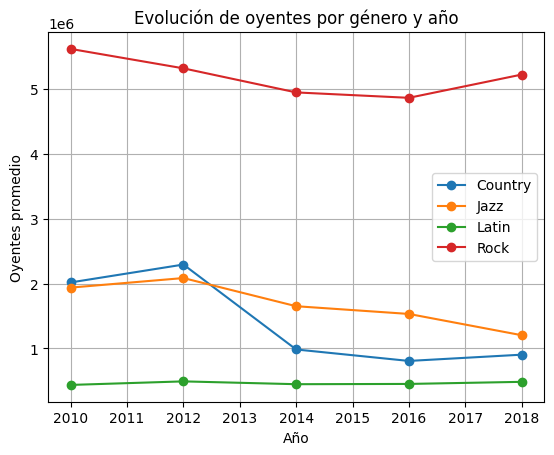

In [18]:
# GRAFICO EVOLUCION DE OYENTES POR GENERO Y AÑO

# Años
años = [2010, 2012, 2014, 2016, 2018]

# Oyentes promedio por género
oyentes_country = [2016986, 2292487, 984175, 807508, 903917]
oyentes_jazz    = [1937262, 2084376, 1650524, 1531515, 1204022]
oyentes_latin   = [437958, 492563, 449097, 453187, 485494]
oyentes_rock    = [5614442, 5315194, 4944388, 4861044, 5219066]

# Graficar cada género
plt.plot(años, oyentes_country, marker='o', label="Country")
plt.plot(años, oyentes_jazz, marker='o', label="Jazz")
plt.plot(años, oyentes_latin, marker='o', label="Latin")
plt.plot(años, oyentes_rock, marker='o', label="Rock")

# Títulos y leyenda
plt.title("Evolución de oyentes por género y año")
plt.xlabel("Año")
plt.ylabel("Oyentes promedio")
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()


In [12]:
## Cerrar la conexion con MySQL

cnx.close()